In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv('adult.csv')

#  Question:
# How does Gender effect Income?

In [4]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
df['income'].unique()
df['income'].replace({'<=50K': 0, '>50K':1},inplace=True)

In [8]:
df['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [9]:
df['gender'] = df['gender'].replace({'Male':1, 'Female':0})

In [10]:
df['gender']

0        1
1        1
2        1
3        1
4        0
        ..
48837    0
48838    1
48839    0
48840    1
48841    0
Name: gender, Length: 48842, dtype: int64

In [11]:
df.education.unique()
df.drop('education',axis=1,inplace=True)

In [12]:
df['educational-num'].unique()

array([ 7,  9, 12, 10,  6, 15,  4, 13, 14, 16,  3, 11,  5,  8,  2,  1],
      dtype=int64)

In [13]:
df['native-country'].unique()

array(['United-States', '?', 'Peru', 'Guatemala', 'Mexico',
       'Dominican-Republic', 'Ireland', 'Germany', 'Philippines',
       'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam',
       'South', 'Columbia', 'Japan', 'India', 'Cambodia', 'Poland',
       'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
       'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica',
       'Ecuador', 'Yugoslavia', 'Hungary', 'Hong', 'Greece',
       'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'France',
       'Holand-Netherlands'], dtype=object)

In [14]:
df_men = df[df['gender'] == 1]
df_women = df[df['gender'] == 0]

In [15]:
df.head()


,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,1,0,0,40,United-States,0
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,1,0,0,50,United-States,0
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,1,0,0,40,United-States,1
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,1,7688,0,40,United-States,1
4,18,?,103497,10,Never-married,?,Own-child,White,0,0,0,30,United-States,0


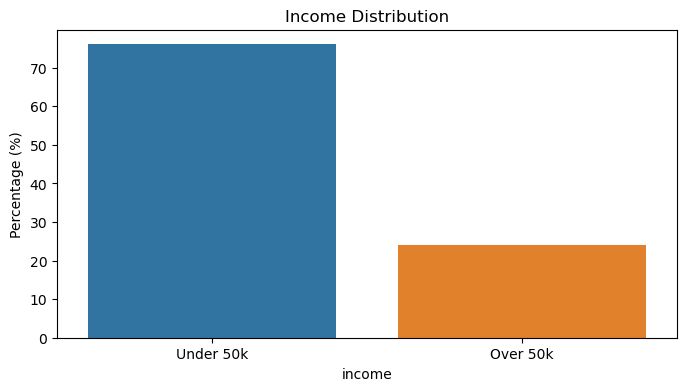

   income  percentage
0       0   76.071823
1       1   23.928177


In [16]:
# Calculate the percentages
income_counts = df['income'].value_counts(normalize=True).reset_index()
income_counts.columns = ['income', 'percentage']

# Convert the percentages to a scale of 100
income_counts['percentage'] *= 100

plt.figure(figsize=(8,4))
ax = sns.barplot(x='income', y='percentage', data=income_counts)
plt.title('Income Distribution')
plt.ylabel('Percentage (%)')

# Renaming the x-axis labels
ax.set_xticklabels(['Under 50k', 'Over 50k'])

plt.show()

print(income_counts)



About 76% of all people in the data earn less thn 50k and about 24 percent earn more than 50k. This is including both Men and Women

Text(0.5, 1.0, 'Males vs Females Count')

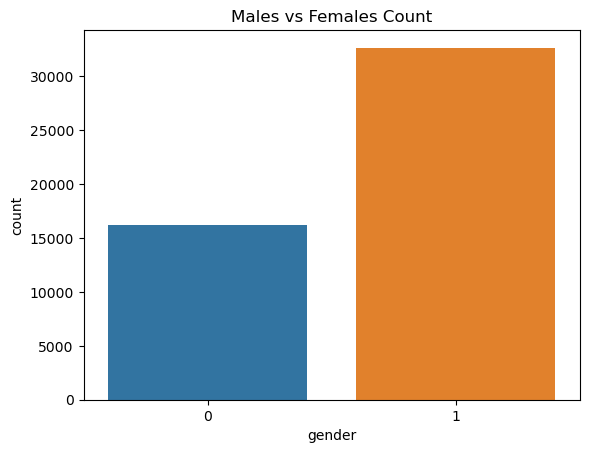

In [17]:
sns.countplot(x='gender',data=df)
plt.title('Males vs Females Count')

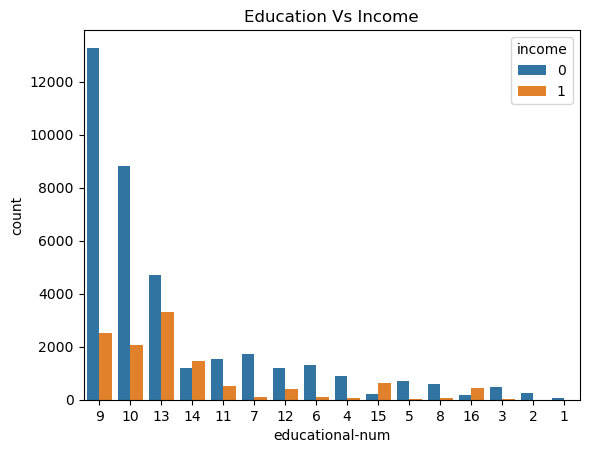

In [18]:
sns.countplot(x='educational-num', hue='income', data=df, order=df['educational-num'].value_counts().index)
plt.title('Education Vs Income')
plt.show()

Lets look at this as percentage of income levels for each education level to get a better idea of how education impacts income

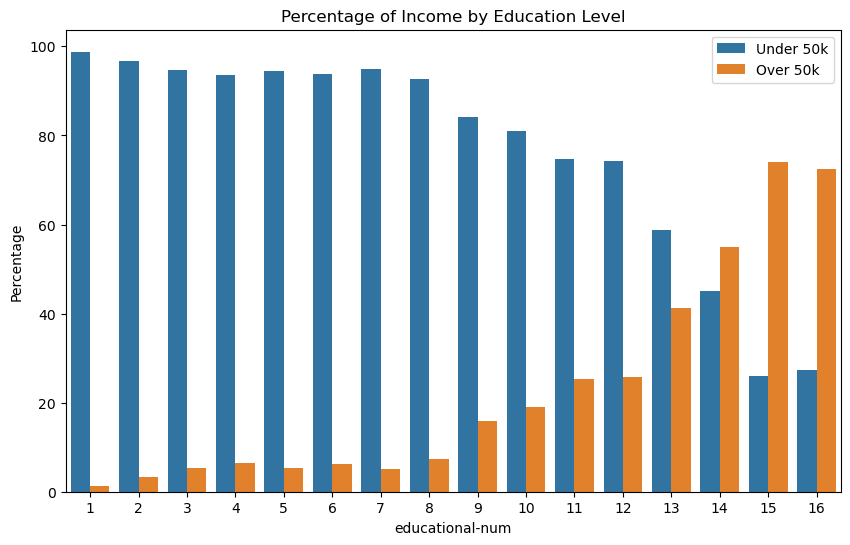

In [19]:
grouped = df.groupby('educational-num')['income'].value_counts(normalize=True).unstack().fillna(0) * 100


grouped_reset = grouped.reset_index().melt(id_vars='educational-num', value_name='Percentage', var_name='Income')


plt.figure(figsize=(10,6))
ax = sns.barplot(data=grouped_reset, x='educational-num', y='Percentage', hue='Income')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Under 50k', 'Over 50k'])
plt.title('Percentage of Income by Education Level')
plt.show()


Higher levevls of education seem to be associated with higher income. Of the people who are more educated, a higher percentage of those people make incomes greater than 50k. Levels 15 and 16 seems to be very close.

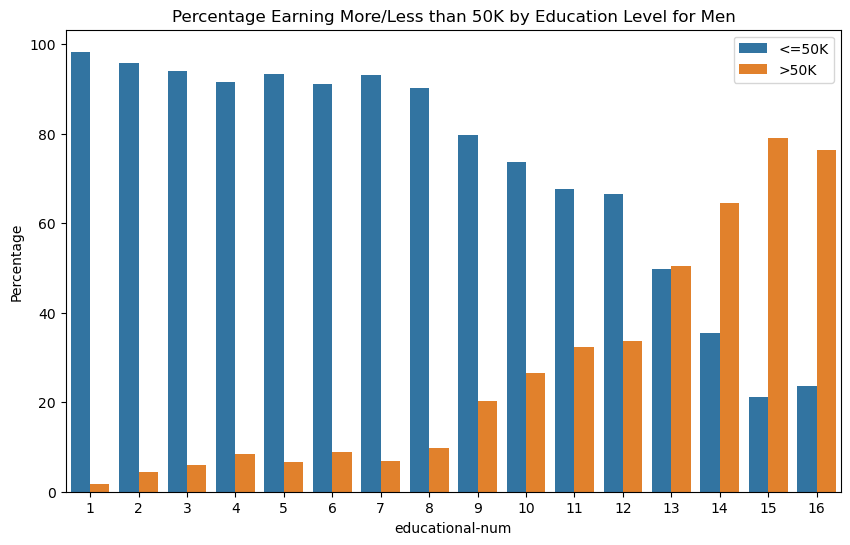

In [38]:
grouped = df_men.groupby('educational-num')['income'].value_counts(normalize=True).unstack().fillna(0) * 100

grouped_reset = grouped.reset_index().melt(id_vars='educational-num', value_name='Percentage', var_name='income')

plt.figure(figsize=(10,6))
ax = sns.barplot(data=grouped_reset, x='educational-num', y='Percentage', hue='income')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['<=50K', '>50K'])
plt.title('Percentage Earning More/Less than 50K by Education Level for Men')
plt.show()

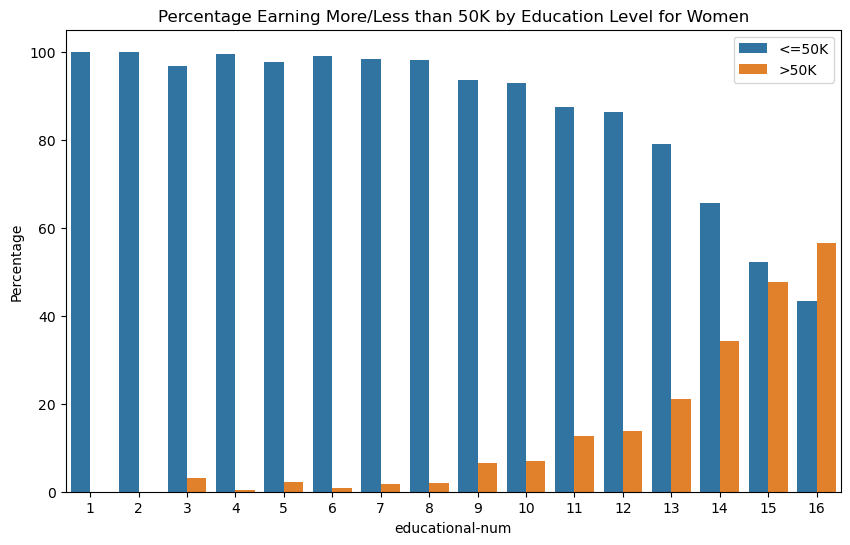

In [39]:
grouped = df_women.groupby('educational-num')['income'].value_counts(normalize=True).unstack().fillna(0) * 100

grouped_reset = grouped.reset_index().melt(id_vars='educational-num', value_name='Percentage', var_name='income')

plt.figure(figsize=(10,6))
ax = sns.barplot(data=grouped_reset, x='educational-num', y='Percentage', hue='income')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['<=50K', '>50K'])
plt.title('Percentage Earning More/Less than 50K by Education Level for Women')
plt.show()

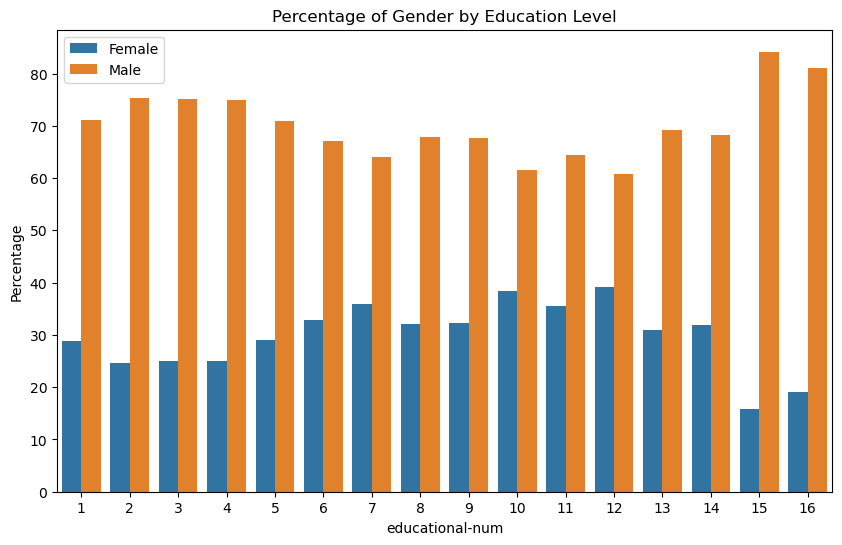

In [20]:
grouped = df.groupby('educational-num')['gender'].value_counts(normalize=True).unstack().fillna(0) * 100


grouped_reset = grouped.reset_index().melt(id_vars='educational-num', value_name='Percentage', var_name='gender')


plt.figure(figsize=(10,6))
ax = sns.barplot(data=grouped_reset, x='educational-num', y='Percentage', hue='gender')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Female', 'Male'])
plt.title('Percentage of Gender by Education Level')
plt.show()

The data shows that a higher percentage of males are educated on all levels BUT this is not a fair assessment since there are more men than women in the data therefore they are more represented here. Lets try some other visualizations to get a better idea of education and genders impact on income. The two bar graphs that split men from women is more fair, and we can see that men actually make more money with more education as compared to women in terms of the percentage of people who earn more.  

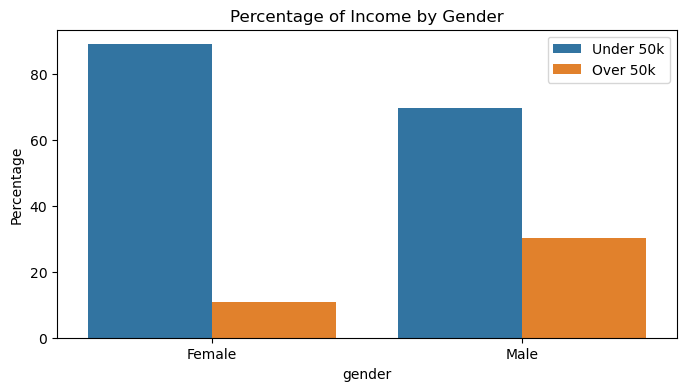

In [21]:
grouped2 = df.groupby('gender')['income'].value_counts(normalize=True).unstack().fillna(0) * 100


grouped_reset = grouped2.reset_index().melt(id_vars='gender', value_name='Percentage', var_name='Income')


plt.figure(figsize=(8,4))
ax = sns.barplot(data=grouped_reset, x='gender', y='Percentage', hue='Income')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Under 50k', 'Over 50k'])

ax.set_xticklabels(['Female', 'Male'])
plt.title('Percentage of Income by Gender')
plt.show()

It looks like on a percentage basis, a higher perecentage of Men make over 50k as opposed to Women. In both cases, the majority of people are still making under 50k. Lets dive a bit deeper and see if we can find some of the root causes for more men making over 50k than women. 

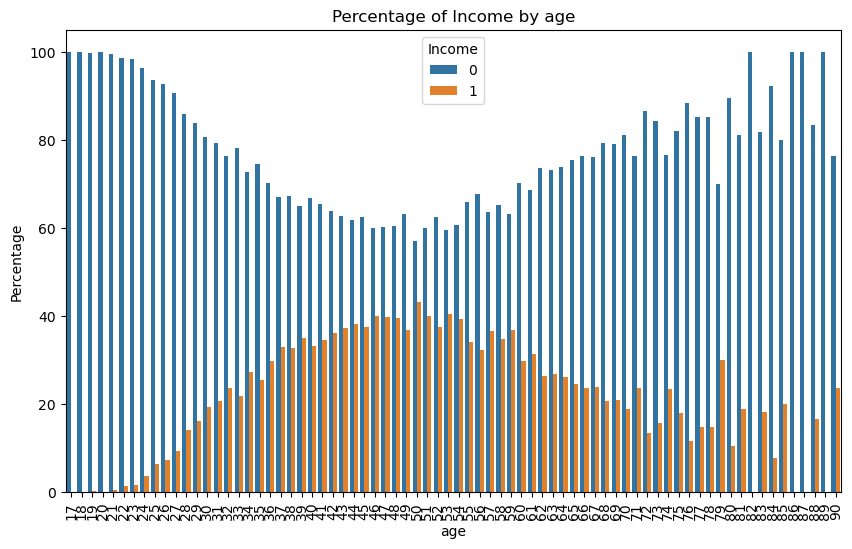

In [22]:
grouped = df.groupby('age')['income'].value_counts(normalize=True).unstack().fillna(0) * 100


grouped_reset = grouped.reset_index().melt(id_vars='age', value_name='Percentage', var_name='Income')


plt.figure(figsize=(10,6))
sns.barplot(data=grouped_reset, x='age', y='Percentage', hue='Income')
plt.title('Percentage of Income by age')
plt.xticks(rotation=90)
plt.show()

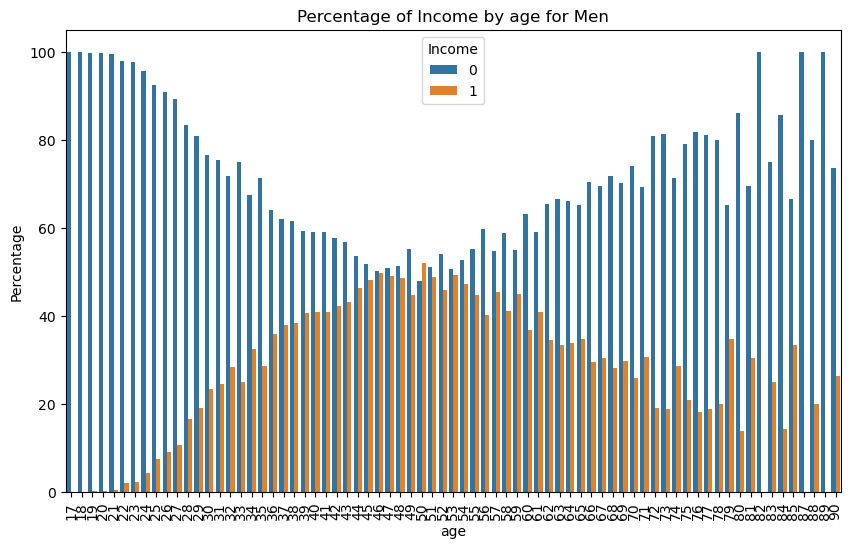

In [23]:
grouped = df_men.groupby('age')['income'].value_counts(normalize=True).unstack().fillna(0) * 100


grouped_reset = grouped.reset_index().melt(id_vars='age', value_name='Percentage', var_name='Income')


plt.figure(figsize=(10,6))
sns.barplot(data=grouped_reset, x='age', y='Percentage', hue='Income')
plt.title('Percentage of Income by age for Men')
plt.xticks(rotation=90)
plt.show()

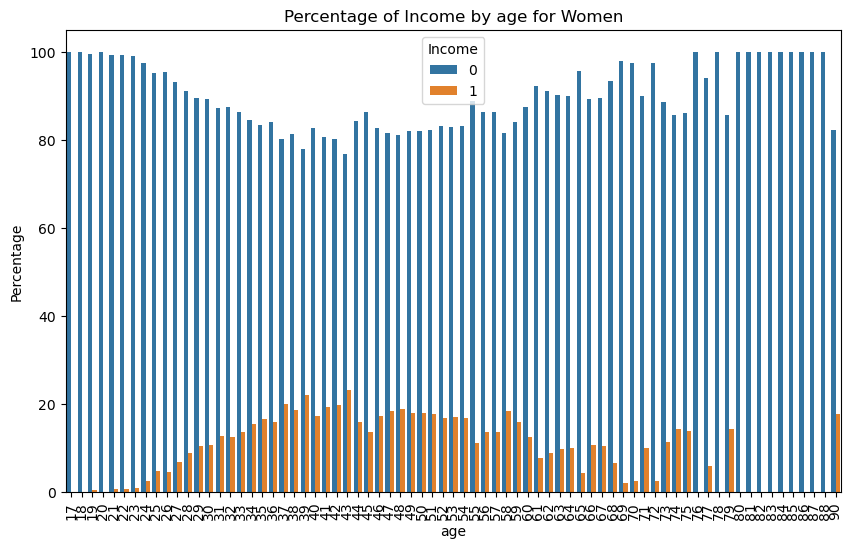

In [24]:
grouped = df_women.groupby('age')['income'].value_counts(normalize=True).unstack().fillna(0) * 100


grouped_reset = grouped.reset_index().melt(id_vars='age', value_name='Percentage', var_name='Income')


plt.figure(figsize=(10,6))
sns.barplot(data=grouped_reset, x='age', y='Percentage', hue='Income')
plt.title('Percentage of Income by age for Women')
plt.xticks(rotation=90)
plt.show()

Age seems to universally increase income for both Men and Women starting from 18 and peaking at around 50 in men and 43 in women. For women, the increase appears more gradual and for men the change is more extreme. All groups seem to have a drop off in income at some point. Overall, much more men appear to make over 50k at some point with the majority making over 50k starting around their 30s. At no point for the women do the majority make over 50k. This is a more fair representation because all women are being measured against other women and all men against all other men. This will help with the problem from earlier that there are more overal men in the dataset than women. 

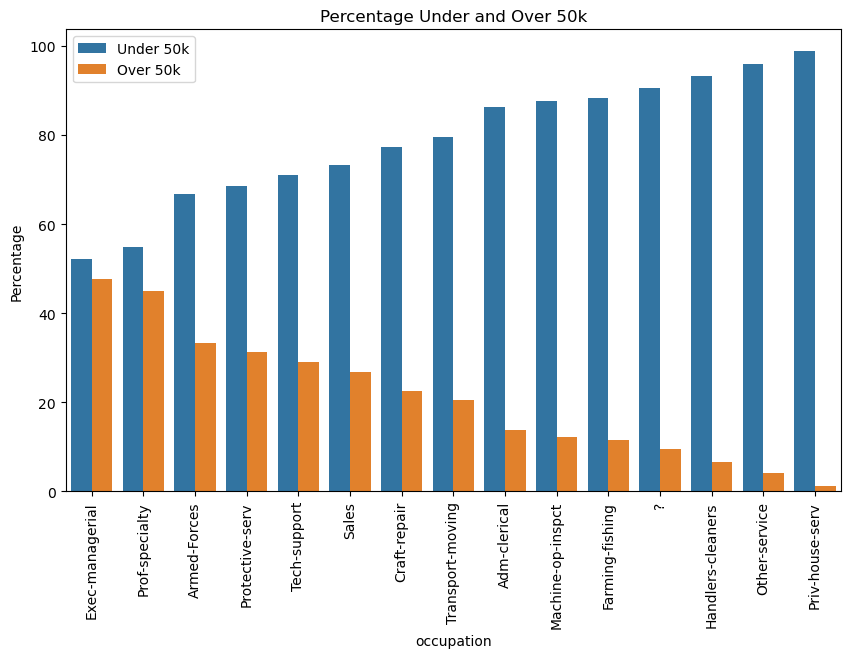

In [25]:
grouped = df.groupby('occupation')['income'].value_counts(normalize=True).unstack().fillna(0) * 100

grouped = grouped.sort_values(by=1,ascending=False)
grouped_reset = grouped.reset_index().melt(id_vars='occupation', value_name='Percentage', var_name='income')


plt.figure(figsize=(10,6))
ax = sns.barplot(data=grouped_reset, x='occupation', y='Percentage', hue='income')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Under 50k', 'Over 50k'])
plt.title('Percentage Under and Over 50k')
plt.xticks(rotation=90)
plt.show()

We will consider the top 5 jobs being the 5 jobs with the greatest percentage of people earning more thank 50k. The top 5 by this standard are Exec managerial, Prof-speciality, Armed Forces, Protetice-Serv and Tech-support. Lets dig in and see what gender gravitates towards these jobs. 

In [26]:
top_jobs = (grouped_reset[grouped_reset['income'] == 1]).sort_values('Percentage',ascending=False)

In [128]:
top_5_jobs = top_jobs['occupation'].head(5)
print("These are the top 5 jobs in terms of the percentage of people who make over 50k")
print(top_5_jobs)
top_5_jobs = list(top_5_jobs)

These are the top 5 jobs in terms of the percentage of people who make over 50k
15    Exec-managerial
16     Prof-specialty
17       Armed-Forces
18    Protective-serv
19       Tech-support
Name: occupation, dtype: object


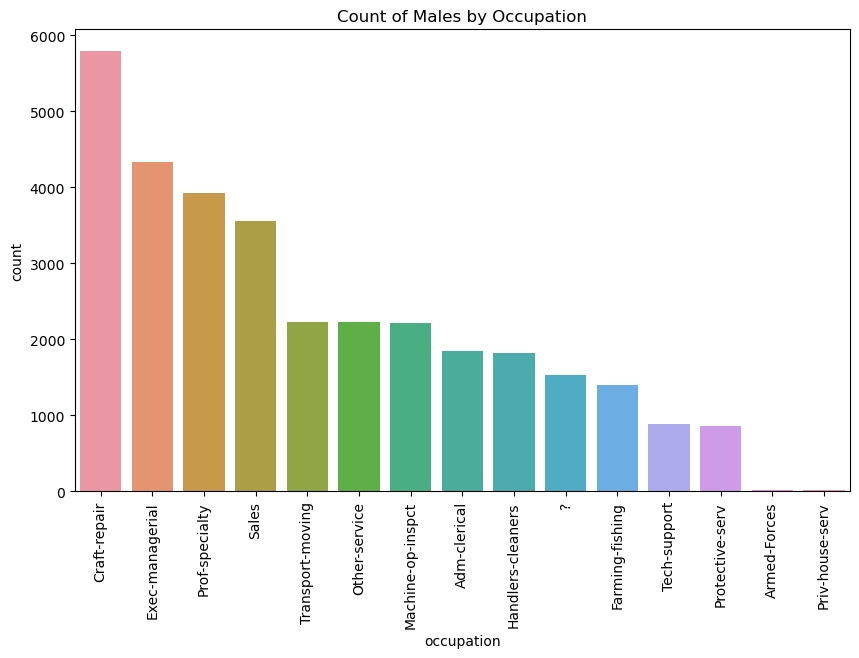

In [34]:
occupation_counts = df_men['occupation'].value_counts().reset_index()
occupation_counts.columns = ['occupation', 'count']

plt.figure(figsize=(10,6))
sns.barplot(data=occupation_counts, x='occupation', y='count')
plt.title('Count of Males by Occupation')
plt.xticks(rotation=90)
plt.show()


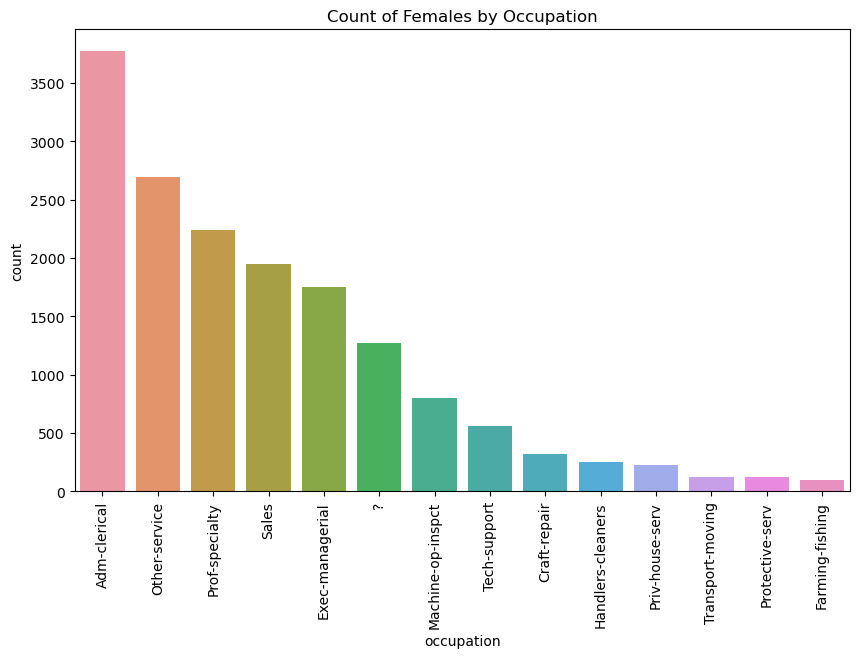

In [36]:
occupation_counts = df_women['occupation'].value_counts().reset_index()
occupation_counts.columns = ['occupation', 'count']

plt.figure(figsize=(10,6))
sns.barplot(data=occupation_counts, x='occupation', y='count')
plt.title('Count of Females by Occupation')
plt.xticks(rotation=90)
plt.show()

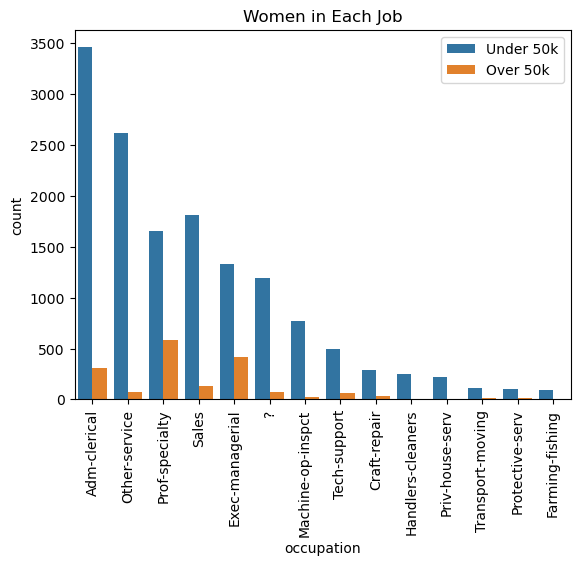

In [145]:
ax = sns.countplot(data=df_women,x='occupation',order= df_women['occupation'].value_counts().index,hue = 'income')
plt.xticks(rotation=90)

plt.title('Women in Each Job')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Under 50k', 'Over 50k'])
    

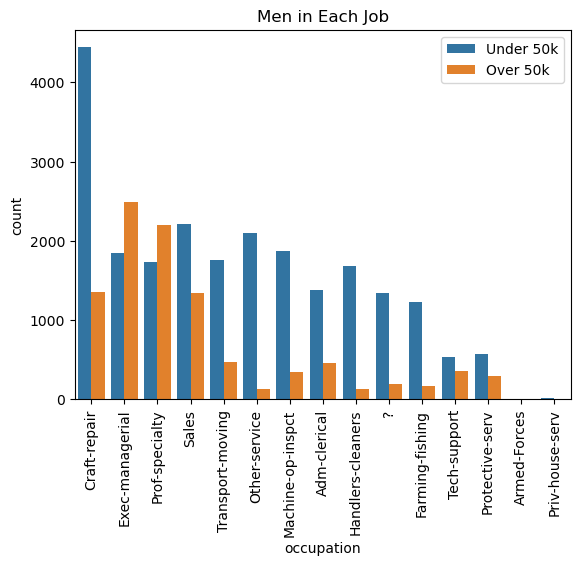

In [144]:
ax = sns.countplot(data=df_men,x='occupation',order= df_men['occupation'].value_counts().index,hue='income')
plt.xticks(rotation=90)
plt.title('Men in Each Job')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Under 50k', 'Over 50k'])

# Conclusion
Men seem to make more money than women and education seems to play the biggest role in predicting income levels. Job title also had an influence, but the mix of men and women doing jobs that were generally higher paying was pretty balanced. Age was shown to increase income for both men and females up to a certain point and eventually declining. Mens income based on age went up higher and more rapidly than that of Women. Its still unclear why men were shown to make more than women who had the same education level but I presume there are other factors that were not looked at in this analysis that could explain more. Perhaps childbearing, race, Nationality and other factors would help explain the difference in pay between men and women as shown by the data. 